# GLOBAL FASHION RETAIL SALES

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np  
import pandas as pd 
import os
import matplotlib.font_manager as fm


# Uploading Datasets Into The Notebook

In [2]:
products = pd.read_csv("products.csv")
customers = pd.read_csv("customers.csv")
employees = pd.read_csv("employees.csv")
stores = pd.read_csv("stores.csv")
discounts = pd.read_csv("discounts.csv")
sells = pd.read_csv("transactions.csv")

# Data Preprocessing

In [3]:
sells["Date"] = pd.to_datetime(sells["Date"])
sells["Month"] = sells["Date"].dt.to_period("M").astype(str)

sells_stores = sells.merge(stores[["Store ID", "Country", "Store Name", "City"]], on = "Store ID", how = "left")
sales_full = sells_stores.merge(products[["Product ID", "Description EN"]], on = "Product ID", how = "left")
returns_full = sales_full[(sales_full["Transaction Type"] == "return")]
sales_full = sales_full[(sales_full["Transaction Type"] == "Sale")]
sales_full.rename(columns={"Description En": "Product Name"}, inplace = True)


In [4]:
sales_full

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,...,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total,Month,Country,Store Name,City,Description EN
0,INV-US-001-03558761,1,47162,485,M,NaN,80.5,1,2023-01-01 15:42:00,0.00,...,$,MASU485-M-,Sale,Cash,126.70,2023-01,United States,Store New York,New York,Men'S Rustic Fabric Blazer With Texture
1,INV-US-001-03558761,2,47162,2779,G,NaN,31.5,1,2023-01-01 15:42:00,0.40,...,$,CHCO2779-G-,Sale,Cash,126.70,2023-01,United States,Store New York,New York,Streetwear Golden Silk
2,INV-US-001-03558761,3,47162,64,M,NEUTRAL,45.5,1,2023-01-01 15:42:00,0.40,...,$,MACO64-M-NEUTRAL,Sale,Cash,126.70,2023-01,United States,Store New York,New York,Luxurious Neutral Suede With Hood
3,INV-US-001-03558762,1,10142,131,M,BLUE,70.0,1,2023-01-01 20:04:00,0.40,...,$,FECO131-M-BLUE,Sale,Cash,77.00,2023-01,United States,Store New York,New York,Formal Blue Jeans With Ruffles
4,INV-US-001-03558762,2,10142,716,L,WHITE,26.0,1,2023-01-01 20:04:00,0.00,...,$,MAT-716-L-WHITE,Sale,Cash,77.00,2023-01,United States,Store New York,New York,High-Tech Suede White Embroidered
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6416822,INV-PT-035-01497756,2,1640168,15414,P,NaN,35.5,1,2025-03-18 08:52:00,0.35,...,€,CHGI15414-P-,Sale,Credit Card,69.55,2025-03,Portugal,Store Coimbra,Coimbra,Boho Jacquard Bege
6416823,INV-PT-035-01497756,3,1640168,15232,G,RED,51.5,1,2025-03-18 08:52:00,0.35,...,€,CHGI15232-G-RED,Sale,Credit Card,69.55,2025-03,Portugal,Store Coimbra,Coimbra,High-Tech Red Denim With Ruffles
6416824,INV-PT-035-01497757,1,1636770,15401,XL,NaN,40.0,1,2025-03-18 19:01:00,0.00,...,€,FESP15401-XL-,Sale,Credit Card,40.00,2025-03,Portugal,Store Coimbra,Coimbra,Female Yoga Shorts
6416825,INV-PT-035-01497758,1,1642472,15671,M,NaN,36.5,1,2025-03-18 19:10:00,0.00,...,€,MAUN15671-M-,Sale,Credit Card,36.50,2025-03,Portugal,Store Coimbra,Coimbra,Men'S Underwear Lightweight Fabric For Extra C...


In [5]:
sales_full.shape

(6077200, 24)

In [6]:
sales_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6077200 entries, 0 to 6416826
Data columns (total 24 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Invoice ID        object        
 1   Line              int64         
 2   Customer ID       int64         
 3   Product ID        int64         
 4   Size              object        
 5   Color             object        
 6   Unit Price        float64       
 7   Quantity          int64         
 8   Date              datetime64[ns]
 9   Discount          float64       
 10  Line Total        float64       
 11  Store ID          int64         
 12  Employee ID       int64         
 13  Currency          object        
 14  Currency Symbol   object        
 15  SKU               object        
 16  Transaction Type  object        
 17  Payment Method    object        
 18  Invoice Total     float64       
 19  Month             object        
 20  Country           object        
 21  Store Name   

In [7]:
sales_full.isnull().sum()

Invoice ID                0
Line                      0
Customer ID               0
Product ID                0
Size                 391102
Color               4120186
Unit Price                0
Quantity                  0
Date                      0
Discount                  0
Line Total                0
Store ID                  0
Employee ID               0
Currency                  0
Currency Symbol           0
SKU                       0
Transaction Type          0
Payment Method            0
Invoice Total             0
Month                     0
Country                   0
Store Name                0
City                      0
Description EN            0
dtype: int64

In [8]:
# sales_full.columns()

In [9]:
sales_full.describe()

,Line,Customer ID,Product ID,Unit Price,Quantity,Date,Discount,Line Total,Store ID,Employee ID,Invoice Total
count,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06,6077200,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06,6.077200e+06
mean,1.573296e+00,7.325784e+05,9.264293e+03,1.324817e+02,1.100198e+00,2024-03-12 18:10:07.603458048,1.257114e-01,1.277003e+02,1.345908e+01,1.562248e+02,2.743566e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+00,2023-01-01 08:00:00,0.000000e+00,1.400000e+00,1.000000e+00,5.000000e+00,1.400000e+00
25%,1.000000e+00,2.944900e+05,6.385000e+03,3.250000e+01,1.000000e+00,2023-09-22 14:55:00,0.000000e+00,2.745000e+01,5.000000e+00,5.800000e+01,3.900000e+01
50%,1.000000e+00,6.764450e+05,9.157000e+03,5.100000e+01,1.000000e+00,2024-03-10 19:56:00,0.000000e+00,4.650000e+01,1.000000e+01,1.220000e+02,9.225000e+01
75%,2.000000e+00,1.138781e+06,1.267900e+04,1.165000e+02,1.000000e+00,2024-10-08 15:55:00,2.500000e-01,1.207500e+02,2.200000e+01,2.530000e+02,2.565500e+02
max,7.000000e+00,1.643306e+06,1.794000e+04,1.153500e+03,3.000000e+00,2025-03-18 20:59:00,6.000000e-01,3.460500e+03,3.500000e+01,4.040000e+02,8.977000e+03
std,1.149609e+00,4.874671e+05,3.856444e+03,1.851204e+02,3.962860e-01,NaN,2.024585e-01,2.037154e+02,1.013426e+01,1.171460e+02,5.190895e+02


In [10]:
sales_full.sample(10)

,Invoice ID,Line,Customer ID,Product ID,Size,Color,Unit Price,Quantity,Date,Discount,...,Currency Symbol,SKU,Transaction Type,Payment Method,Invoice Total,Month,Country,Store Name,City,Description EN
219352,INV-US-001-03707348,5,37656,7344,L,BLUE,71.50,3,2024-01-07 19:03:00,0.40,...,$,MACO7344-L-BLUE,Sale,Credit Card,292.70,2024-01,United States,Store New York,New York,Modern Blue Velvet With Buttons
5454068,INV-ES-026-04811572,1,1308871,14446,38,NaN,52.00,1,2024-12-30 19:25:00,0.50,...,€,MAPA14446-38-,Sale,Cash,26.00,2024-12,España,Store Madrid,Madrid,Dark Male Jeans With Contrasting Fabric Details
2077179,INV-CN-007-02138812,1,669770,2503,M,NaN,172.00,1,2023-02-26 11:10:00,0.00,...,¥,FESK2503-M-,Sale,Credit Card,1138.00,2023-02,中国,Store 北京,北京,Long Cotton Skirt
1506137,INV-US-005-04241313,1,270482,5422,M,BEIGE,23.50,1,2023-04-08 18:19:00,0.00,...,$,MAT-5422-M-BEIGE,Sale,Cash,23.50,2023-04,United States,Store Phoenix,Phoenix,Beige Cotton Boho With Glitter
5354389,INV-ES-026-04744244,2,1366484,7018,M,NaN,26.25,1,2024-02-02 16:51:00,0.00,...,€,CHSW7018-M-,Sale,Credit Card,70.70,2024-02,España,Store Madrid,Madrid,Children'S Jersey With Sparkles And Enchanted ...
6006477,INV-PT-031-03908340,1,1541017,13369,M,NaN,26.50,1,2024-12-08 09:05:00,0.00,...,€,FET-13369-M-,Sale,Credit Card,26.50,2024-12,Portugal,Store Lisboa,Lisboa,Top Women'S Bright Satin
4831380,INV-FR-022-02596305,1,1157858,7751,M,BLUE,63.50,1,2023-09-11 12:36:00,0.45,...,€,FEDR7751-M-BLUE,Sale,Cash,81.93,2023-09,France,Store Marseille,Marseille,Formal Blue Linen Padded
4396661,INV-UK-018-01844228,1,1001158,14964,M,RED,17.00,1,2025-03-16 08:44:00,0.35,...,£,MAT-14964-M-RED,Sale,Credit Card,11.05,2025-03,United Kingdom,Store Glasgow,Glasgow,Classic Red Embroidered Tricot
2764254,INV-CN-009-04942771,1,591043,3576,M,BEIGE,218.00,1,2023-04-10 16:42:00,0.00,...,¥,MAT-3576-M-BEIGE,Sale,Credit Card,218.00,2023-04,中国,Store 深圳,深圳,Casual Beige Lace With Fringes
3243934,INV-DE-011-03185642,1,727282,2828,NaN,NaN,19.25,1,2023-01-14 20:59:00,0.00,...,€,MAAC2828--,Sale,Cash,22.75,2023-01,Deutschland,Store Berlin,Berlin,Felt Cowboy Men'S Hat


# EDA

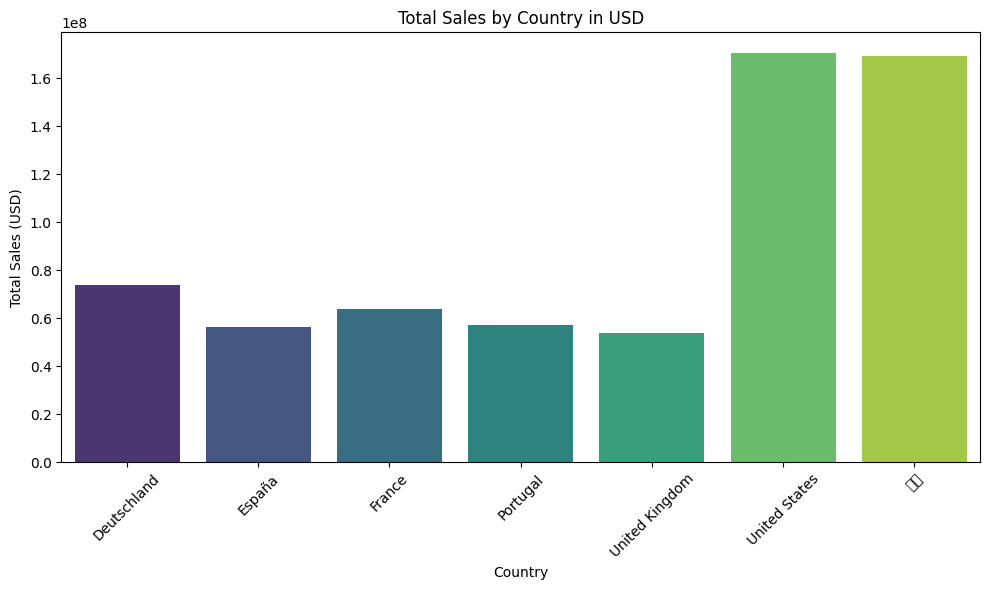

In [11]:
exchange_rates = {
    'EUR': 1.0886,
    'GBP': 1.3620,
    'CNY': 0.1383,
    'USD': 1.0
}

sales_full['Exchange Rate'] = sales_full['Currency'].map(exchange_rates)
sales_full['Invoice Total USD'] = sales_full['Invoice Total'] * sales_full['Exchange Rate']
country_sales_usd = sales_full.groupby('Country')['Invoice Total USD'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=country_sales_usd, x='Country', y='Invoice Total USD', palette='viridis')
plt.title('Total Sales by Country in USD')
plt.xlabel('Country')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Quantity By Countries

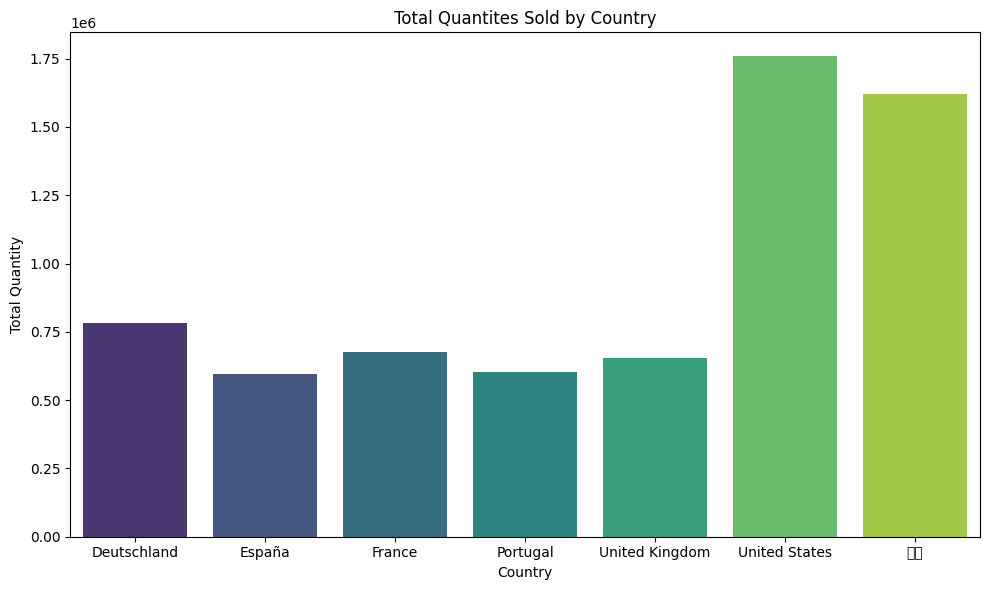

In [12]:
qty_by_country = sales_full.groupby("Country")["Quantity"].sum().reset_index()

plt.figure(figsize = (10,6))
sns.barplot(data=qty_by_country, x= "Country", y = "Quantity", palette = "viridis")
plt.title("Total Quantites Sold by Country")
plt.xlabel("Country")
plt.ylabel("Total Quantity")
plt.tight_layout()
plt.show()


# Discount by Date 

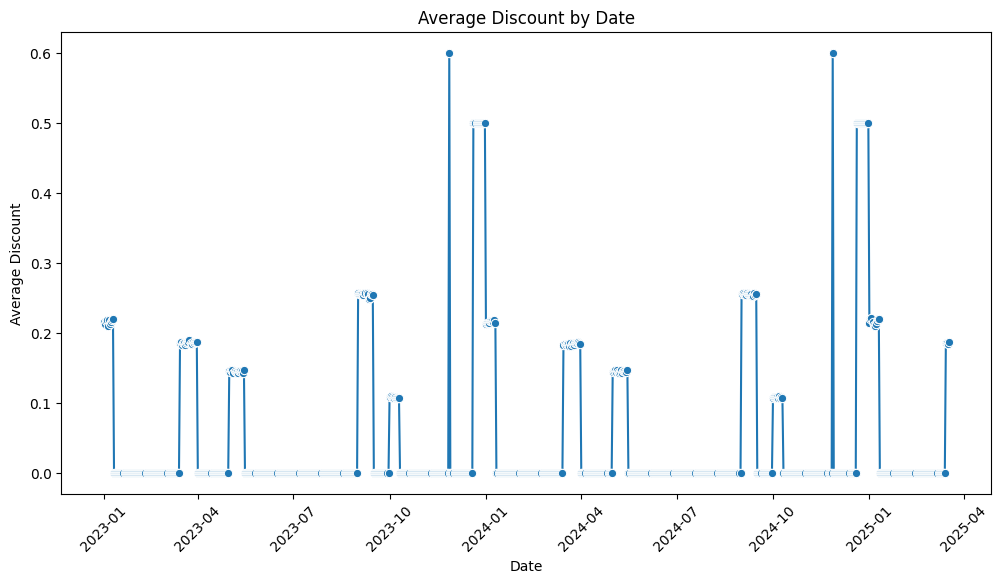

In [13]:
discounts_by_date = sales_full.groupby(sales_full["Date"].dt.date)["Discount"].mean().reset_index()
discounts_by_date["Date"] = pd.to_datetime(discounts_by_date["Date"])

plt.figure(figsize = (12,6))
sns.lineplot(data = discounts_by_date, x = "Date", y = "Discount", marker = "o")
plt.title("Average Discount by Date")
plt.xlabel("Date")
plt.ylabel("Average Discount")
plt.xticks(rotation = 45)
plt.show()

# Sales Volume by Month and Country

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

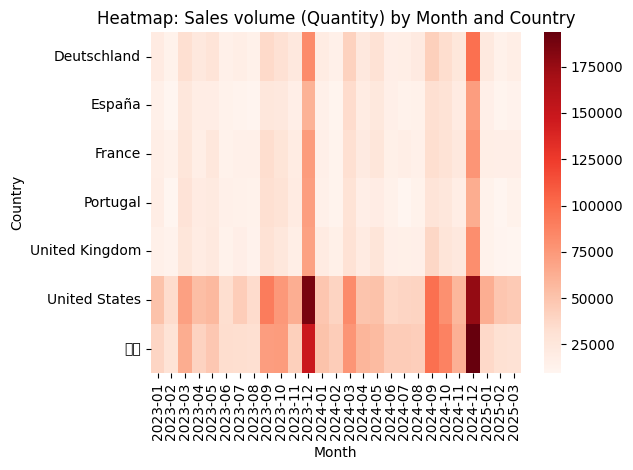

In [14]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

sales_month_country = sales_full.groupby(["Month", "Country"])["Quantity"].sum().reset_index()
pivot_month_country = sales_month_country.pivot(index = "Country", columns = "Month", values = "Quantity")

sns.heatmap(pivot_month_country, annot = False, cmap = "Reds")

plt.title("Heatmap: Sales volume (Quantity) by Month and Country")
plt.xlabel("Month")
plt.ylabel("Country")

plt.tight_layout()
plt.show()

# Revenue By payment Method

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

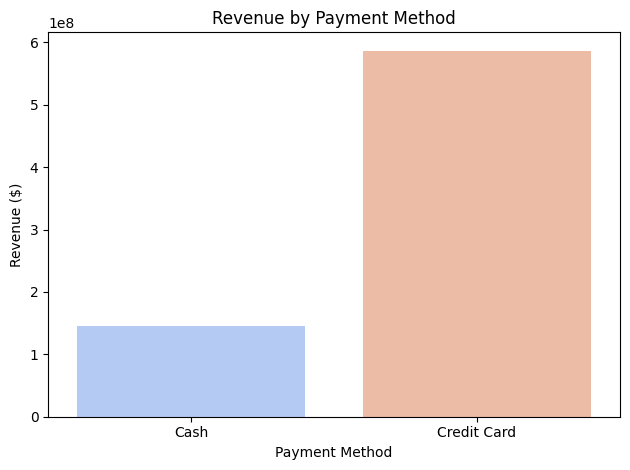

In [15]:
revenue_by_payment = sells.groupby('Payment Method')['Line Total'].sum().reset_index()

sns.barplot(data=revenue_by_payment, x='Payment Method', y='Line Total', palette="coolwarm")
plt.title("Revenue by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

# Age Distribution by country

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

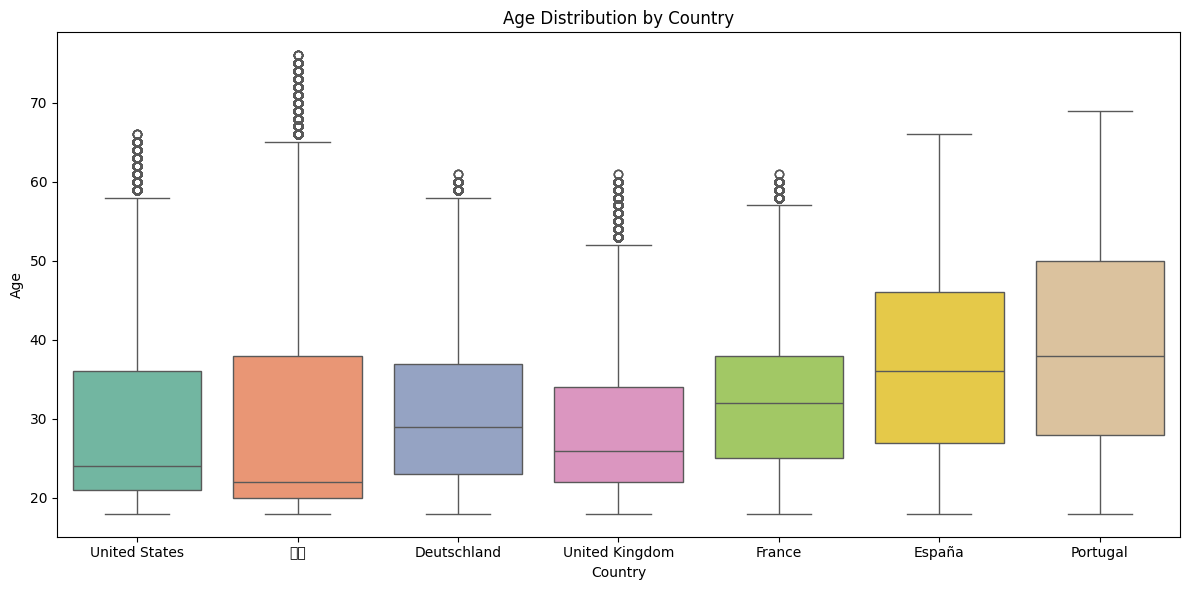

In [16]:
customers["Date Of Birth"] = pd.to_datetime(customers["Date Of Birth"])
today = pd.to_datetime("today")
customers["Age"] = (today - customers["Date Of Birth"]).dt.days / 365.25
customers["Age"] = customers["Age"].astype(int)

plt.figure(figsize = (12,6))
sns.boxplot(data = customers, x="Country", y = "Age", palette = "Set2")
plt.title("Age Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


# Top 15 Stores by Quantities Sold (Store Names)

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

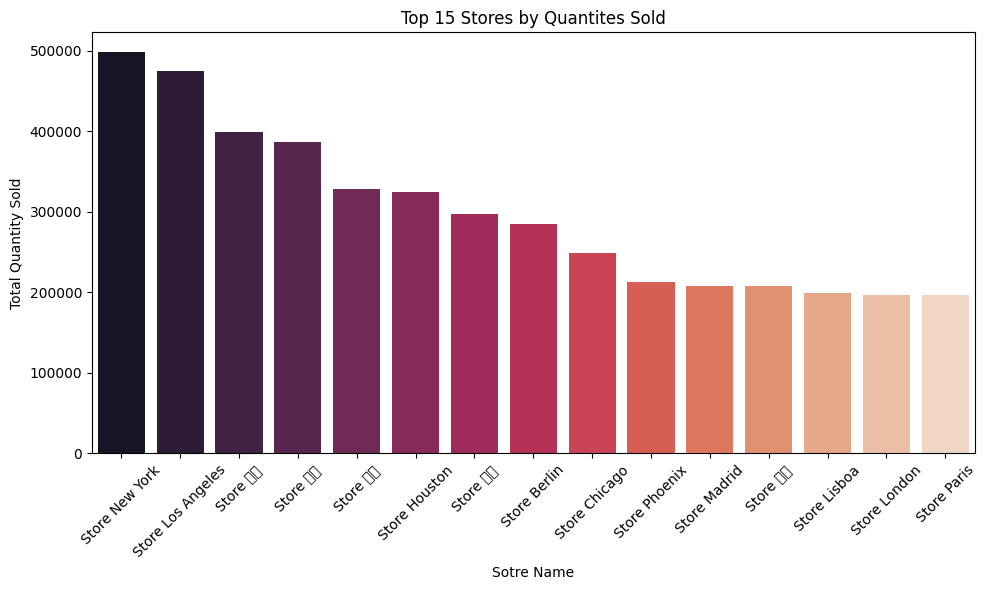

In [17]:
top5_stores = sales_full.groupby("Store Name")["Quantity"].sum().reset_index()
top5_stores = top5_stores.sort_values(by = "Quantity", ascending=False).head(15)

plt.figure(figsize = (10,6))
sns.barplot(data = top5_stores, x = "Store Name", y = "Quantity", palette = "rocket")
plt.title("Top 15 Stores by Quantites Sold")
plt.xlabel("Sotre Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


# Sales Quantites In Portugal By Store and Month

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

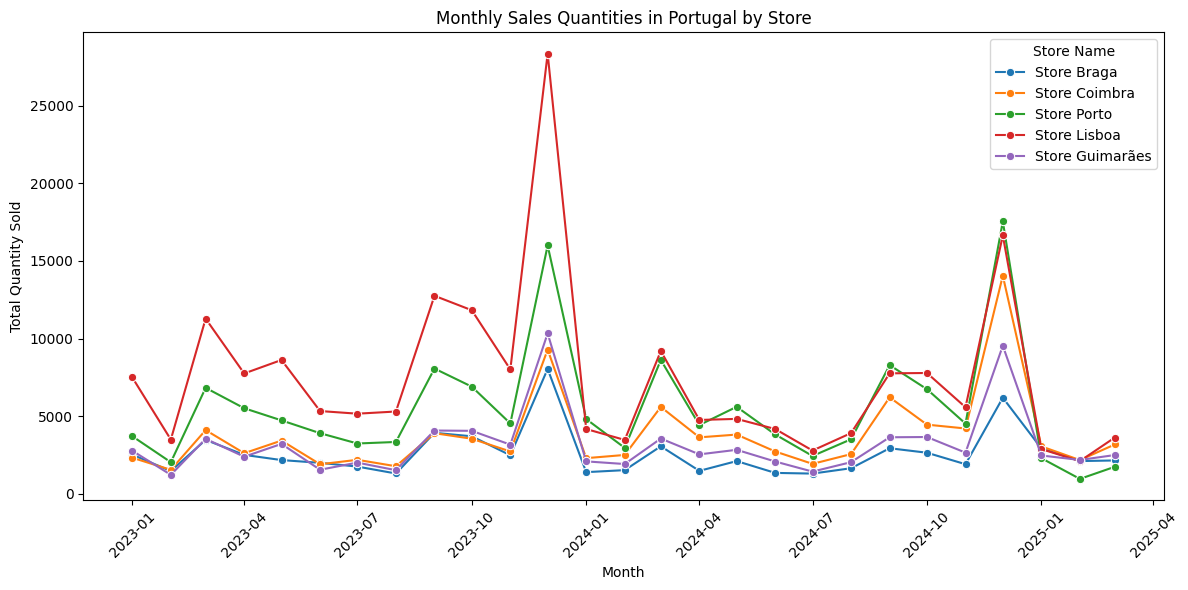

In [18]:
portugal_sales = sales_full[sales_full["Country"].str.lower() == "portugal"]
sales_portugal = portugal_sales.groupby(["Store Name", "Month"])["Quantity"].sum().reset_index()
sales_portugal["Month_dt"] = pd.to_datetime(sales_portugal["Month"], format = "%Y-%m")
sales_portugal = sales_portugal.sort_values(by="Month_dt")

plt.figure(figsize = (12,6))
sns.lineplot(data = sales_portugal, x = "Month_dt", y = "Quantity", hue = "Store Name", marker = "o")
plt.title("Monthly Sales Quantities in Portugal by Store")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Sales Comparison : 2024 vs 2023 - Lisbon

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

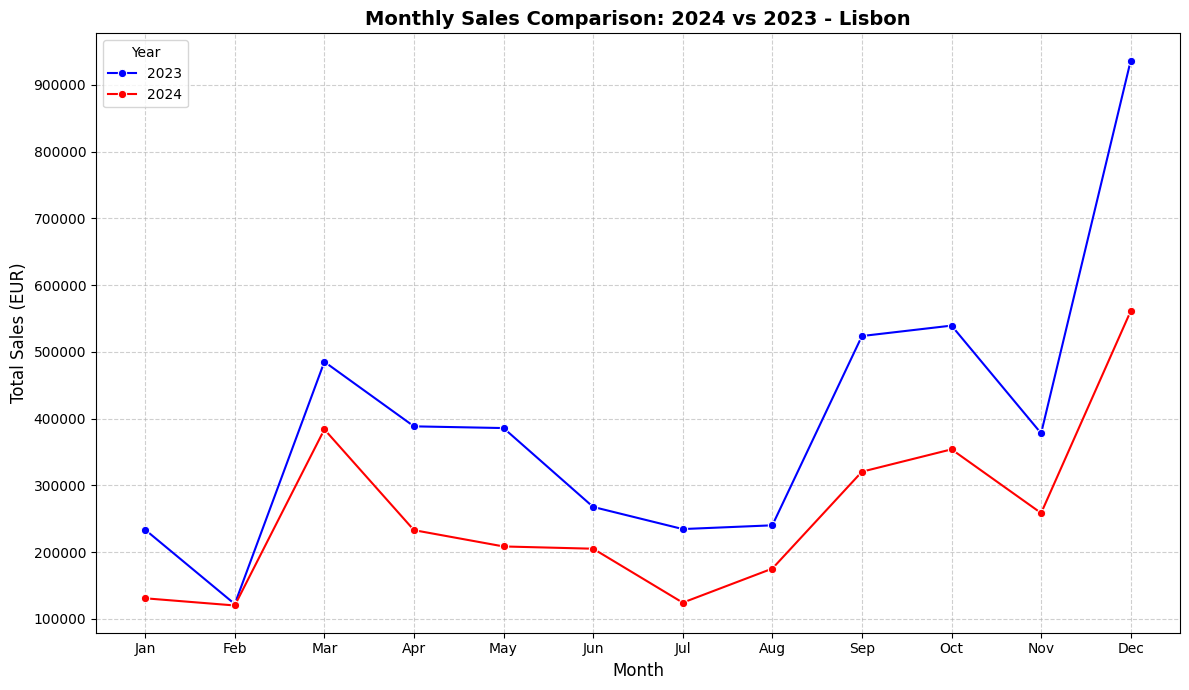

In [19]:
sales_full['Date'] = pd.to_datetime(sales_full['Date'])

lisbon_sales = sales_full[
    (sales_full['Country'].str.lower() == 'portugal') &
    (sales_full['Store Name'].str.contains('Lisboa', case=False, na=False)) &
    (sales_full['Date'].dt.year.isin([2023, 2024]))
]

lisbon_sales["Year"] = lisbon_sales["Date"].dt.year
lisbon_sales["Month"] = lisbon_sales["Date"].dt.strftime("%b")  # Short month names (Jan, Feb, etc.)
lisbon_sales["Month_Num"] = lisbon_sales["Date"].dt.month  # Numeric month for sorting

monthly_sales = (
    lisbon_sales.drop_duplicates(subset="Invoice ID")  # Ensure distinct Invoice IDs
    .groupby(["Month", "Month_Num", "Year"])["Invoice Total"]
    .sum()
    .reset_index()
)

monthly_sales = monthly_sales.sort_values(["Month_Num", "Year"])

plt.figure(figsize=(12, 7))
sns.lineplot(data=monthly_sales, x="Month", y="Invoice Total", hue="Year", marker="o", palette=["blue", "red"])

plt.title("Monthly Sales Comparison: 2024 vs 2023 - Lisbon", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Sales (EUR)", fontsize=12)
plt.xticks(rotation=0)  
plt.legend(title="Year")

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Daily Sales Quantities for the Lisboa Store in Portugal during January 2025

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

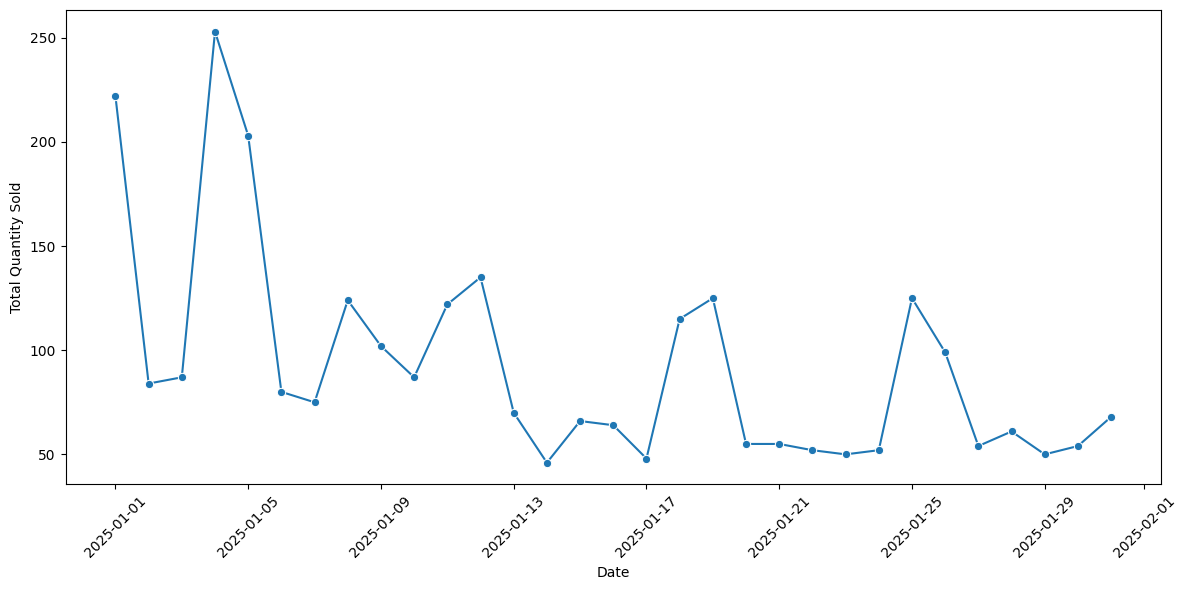

In [20]:
braga_sales = sales_full[
  (sales_full["Country"].str.lower() == "portugal") & 
  (sales_full["Store Name"].str.contains("Lisboa", case= False)) & 
  (sales_full["Date"].dt.year == 2025)
]

braga_january_2025 = braga_sales[braga_sales["Date"].dt.month ==1]

daily_braga_2025 = braga_january_2025.groupby(braga_january_2025["Date"].dt.date)["Quantity"].sum().reset_index()
daily_braga_2025.columns = ["Date", "Total Quantity"]

plt.figure(figsize=(12,6))
sns.lineplot(data = daily_braga_2025, x="Date", y= "Total Quantity", marker = "o")
plt.xlabel("Date")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()